# STEP #1: IMPORT LIBRARIES


In [ ]:
!pip install -q rasterio

     |████████████████████████████████| 18.2MB 165kB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

# STEP #2: LOAD DATASET


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# to access the file
def GoogleDriveAuth(ID,file_name):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file = drive.CreateFile({'id': ID})
    file.GetContentFile(file_name)
    return file

In [ ]:
# https://drive.google.com/file/d/1flXtFuKJm4yQWq4q02pa2UxHs9M4I4Lj/view?usp=sharing
GoogleDriveAuth('1flXtFuKJm4yQWq4q02pa2UxHs9M4I4Lj','images.tif')
#https://drive.google.com/file/d/1eUgxdfyF1lH5n2sg2bahSU7dmdxsNMIp/view?usp=sharing
GoogleDriveAuth('1eUgxdfyF1lH5n2sg2bahSU7dmdxsNMIp','labels.tif')

GoogleDriveFile({'id': '1eUgxdfyF1lH5n2sg2bahSU7dmdxsNMIp', 'kind': 'drive#file', 'etag': '"MTU4OTg2MTQ4MTAwMA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1eUgxdfyF1lH5n2sg2bahSU7dmdxsNMIp', 'webContentLink': 'https://drive.google.com/uc?id=1eUgxdfyF1lH5n2sg2bahSU7dmdxsNMIp&export=download', 'alternateLink': 'https://drive.google.com/file/d/1eUgxdfyF1lH5n2sg2bahSU7dmdxsNMIp/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1eUgxdfyF1lH5n2sg2bahSU7dmdxsNMIp/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/image/tiff', 'title': 'labels.tif', 'mimeType': 'image/tiff', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2020-05-19T04:44:00.289Z', 'modifiedDate': '2020-05-19T04:11:21.000Z', 'lastViewedByMeDate': '2020-06-14T09:37:58.893Z', 'markedViewedByMeDate': '1970-01-01T00:00:00.000Z', 'version': '16', 'parents'

In [ ]:
import rasterio
src = rasterio.open('images.tif')
label = rasterio.open('labels.tif')

In [ ]:
array = src.read(1)

In [ ]:
len(array)

1800

# STEP #3: DATA VISUALIZATION


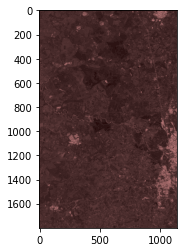

In [ ]:
from matplotlib import pyplot
pyplot.imshow(array, cmap='pink')
pyplot.show()  

In [ ]:
label.indexes

(1,)

In [ ]:
type(src.indexes)

tuple

# STEP #4: DATA PREPROCESSING


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
l=[]
for i in range (1,len(src.indexes)+1):
  # (src.read(i))
  l.append(src.read(i))

In [ ]:
y = np.stack( l, axis=0 )
print(y.shape)
z = y.reshape(len(y), -1)
print(z.shape)

(60, 1800, 1135)
(60, 2043000)


In [ ]:
scaler.fit(z)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
z.shape

(60, 2043000)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(z,
	test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape,x_test.shape)

(48, 2043000) (12, 2043000)


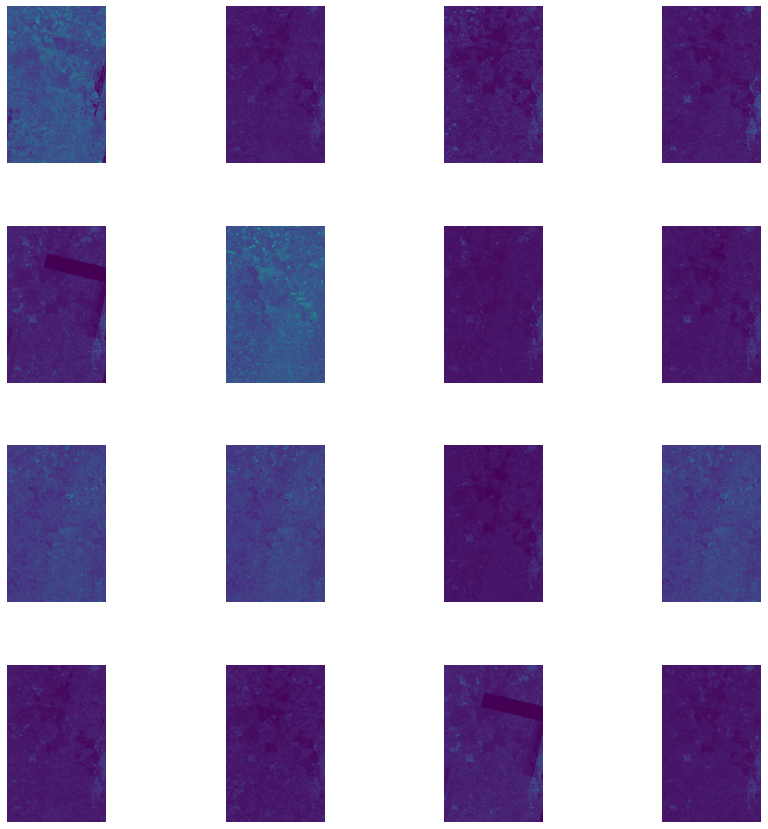

In [ ]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(x_train[index].reshape(len(array),-1))
    # axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

Using TensorFlow backend.


# STEP#4: BUILD AND TRAIN VAE DEEP LEARNING MODEL

In [ ]:
# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.

    # Arguments
        args (tensor): mean and log of variance of Q(z|X)

    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [ ]:
image_size = x_train.shape[1]

In [ ]:
original_dim=image_size

In [ ]:
# network parameters
input_shape = (original_dim, )
intermediate_dim = 10
batch_size = 128
latent_dim = 3
epochs = 500



In [ ]:
# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
# x = Dense(intermediate_dim, activation='relu')(inputs)
# z_mean = Dense(latent_dim, name='z_mean')(x)
# z_log_var = Dense(latent_dim, name='z_log_var')(x)

In [ ]:

x = Dense(intermediate_dim, activation='relu')(inputs)


In [ ]:
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

In [ ]:
# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])




Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 2043000)      0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 10)           20430010    encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 3)            33          dense_15[0][0]                   
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 3)            33          dense_15[0][0]                   
____________________________________________________________________________________________

In [ ]:
vae = Model(inputs, outputs, name='vae_mlp')
reconstruction_loss = binary_crossentropy(inputs,outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.summary()

Model: "vae_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 2043000)           0         
_________________________________________________________________
encoder (Model)              [(None, 3), (None, 3), (N 20430076  
_________________________________________________________________
decoder (Model)              (None, 2043000)           22473040  
Total params: 42,903,116
Trainable params: 42,903,116
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.
  'be expecting any data to be passed to {0}.'.format(name))


In [ ]:
history=vae.fit(x_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(x_test, None))

Train on 48 samples, validate on 12 samples
Epoch 1/500
48/48 [==============================] - 1s 24ms/step - loss: 1416102.5000 - val_loss: 1304336.8750
Epoch 2/500
48/48 [==============================] - 1s 18ms/step - loss: 1306843.7500 - val_loss: 1228967.0000
Epoch 3/500
48/48 [==============================] - 1s 18ms/step - loss: 1214437.8750 - val_loss: 1212881.6250
Epoch 4/500
48/48 [==============================] - 1s 18ms/step - loss: 1173600.0000 - val_loss: 1151600.8750
Epoch 5/500
48/48 [==============================] - 1s 18ms/step - loss: 1113826.1250 - val_loss: 1079633.5000
Epoch 6/500
48/48 [==============================] - 1s 18ms/step - loss: 1056664.3750 - val_loss: 1050792.1250
Epoch 7/500
48/48 [==============================] - 1s 18ms/step - loss: 1031375.5625 - val_loss: 994948.3125
Epoch 8/500
48/48 [==============================] - 1s 18ms/step - loss: 964524.0000 - val_loss: 972674.8125
Epoch 9/500
48/48 [==============================] - 1s 18ms/st

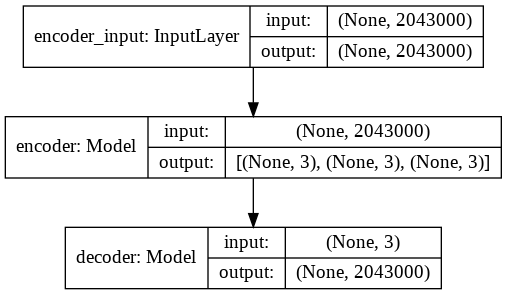

In [ ]:
plot_model(vae,
            to_file='vae_mlp.png',
            show_shapes=True)

In [ ]:
vae.save_weights('vae_mlp.h5')

# STEP #5: EVALUATE THE MODEL


In [ ]:
predicted = vae.predict(x_test)

In [ ]:
predicted.shape

(12, 2043000)

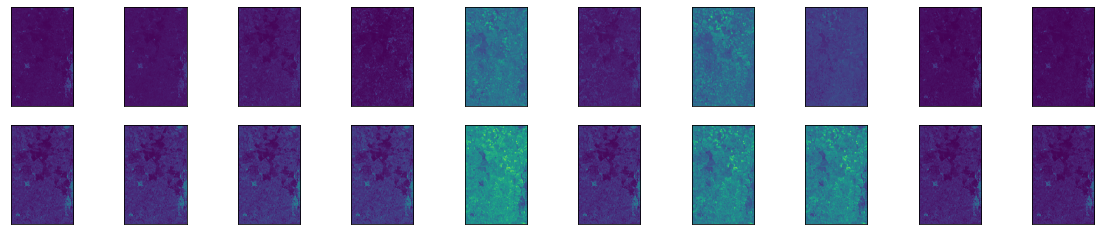

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([x_test, predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape(len(array),-1))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [ ]:
import numpy as np, gdal, matplotlib.pyplot as plt

In [ ]:
# f2='labels.tif'

# fi = 'labels.tif'
# ds = gdal.Open(fi)
# ds.GetRasterBand(1).ReadAsArray()
# labels = ds.ReadAsArray()
# label_1data = reduced_image[(labels==1)]


In [ ]:
# fi = 'labels.tif'
# ds2 = gdal.Open(fi)
# labels = ds2.ReadAsArray()

In [ ]:
# fi = 'labels.tif'
# ds = gdal.Open(fi)
# labels = ds.ReadAsArray()

# label_1data = reduced_image[(labels==1)]

# label_2data = reduced_image[(labels==2)]

# x = label_1data[:, 0]; y = label_1data[:, 1]
# ax.scatter(x, y, alpha=1.0, c='red', s=5, label='1')

In [ ]:
# from keras.datasets import mnist
# #
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# y_test.shape

In [ ]:
import random
randomlist = []
for i in range(0,12):
   n =1
   randomlist.append(n)

In [ ]:
predicted.shape

(12, 2043000)

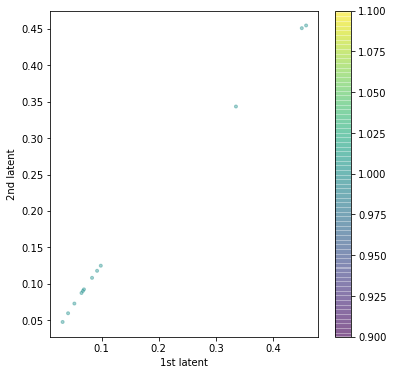

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(predicted[:, 0], predicted[:, 1], c=randomlist,
            alpha=.4, s=3**2, cmap='viridis')
plt.xlabel("1st latent")
plt.ylabel("2nd latent")

plt.colorbar()
plt.show()

In [ ]:
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import rasterio
ds2 = rasterio.open('labels.tif')
labels = ds2.read(1)

In [ ]:
labels.shape

In [ ]:
fi = 'labels.tif'
ds2 = gdal.Open(fi)
labels = ds2.ReadAsArray()
labels.shape

In [ ]:
import random
randomlist = []
for i in range(0,60):
   n = random.randint(1,8)
   randomlist.append(n)

In [ ]:
len(randomlist)